# Task: analyse wines data set by Kumar Dastan

## Data Preparation step

In [11]:
#Import all the neccessary modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import sklearn

In [2]:
#Import data from drink.csv file
dframe = pd.read_csv('drink.csv', delimiter=';')

Let's check imported file. Because there is a lot of data in the file, we need to print the first 5 lines. 

This will give us an opportunity to find out what features we will have to work on next.

In [3]:
#To print first 5 columns, let's use pandas' head() function
dframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Now, we can see that we'll work with chemical and their terminology, we can dive in deeper further :)

But for now, let's check if our data set correct (doesn't have empty cells and each of them in the same types).

If there is any kind of inaccuracy, this can lead to the results obtained.

In [4]:
#Numpy's isnan() function checks if table contains empty cells, but it returns all table with boolean result.
#It'll be complicated to check all rows and columns.
np.isnan(dframe).head()

#I need something else

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#Next, I figured out that any() function can help in my purposes, to check if any cell is empty
np.isnan(dframe).any()

#Now, we can be sure that our table doesn't contain empty cells and move on

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
#We can see, each column's type and be sure that it doesn't contains object and that we can do math equations
dframe.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Data Exploring step

### Before exploring, let's investigate what each chemical term means

<b>Fixed acidity</b> - difference between the total acidity and the volatile acidity

<b>Volatile acidity</b> - refers to the steam distillable acids

<b>Citric acid</b> - weak organic acid

<b>Residual sugar</b> - refers to the sugar remaining after fermentation stops

<b>Chlorides</b> - refers to be salt

<b>Free sulfur dioxide</b> - helpfull in preventing microbial growth and the oxidation of wine

<b>Total sulfur dioxide</b> - is a measure of both the free and bound forms of sulfur dioxide

<b>Density</b> - is substance its mass per unit volume

<b>pH</b> - used to specify the acidity or basicity of an aqueous solution

<b>Sulphates</b> - refers to be salt

<b>Alcohol</b> - is any organic compound

## Data visualization step

Let's investigate and visualise outputs

In [7]:
#Let's see basic information about our table including mean, standard deviation, min and max etc.
np.round(dframe.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


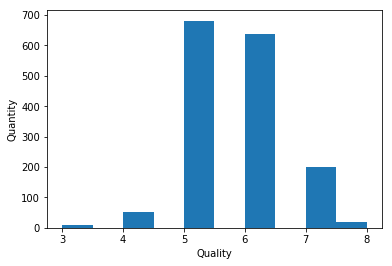

In [8]:
#By matplotlib's histogram visualization, we can visualize and see quantity of each quality
plt.hist(dframe['quality'], bins=10)
plt.xlabel('Quality')
plt.ylabel('Quantity')
plt.show()

Now, we can see that's quality with points 5 and 6 is majority. 

We can divide our data set into 3 parts:

- Qualities below 5
- Qualities with 5 and 6
- Qualities above 6

In [9]:
#Quality below 5
rating_below_5 = dframe.loc[(dframe['quality'] < 5)].shape[0]
print "Rating below 5:"
print rating_below_5

#Qualities with 5 and 6
rating_between_5_6 = dframe.loc[(dframe['quality'] >= 5) & (dframe['quality'] <= 6)].shape[0]
print "Rating between 5 and 6:"
print rating_between_5_6

#Quality above 6
rating_above_6 = dframe.loc[(dframe['quality'] > 6)].shape[0]
print "Rating above 6"
print rating_above_6

Rating below 5:
63
Rating between 5 and 6:
1319
Rating above 6
217


Let's visualise we've got result's with pie chart

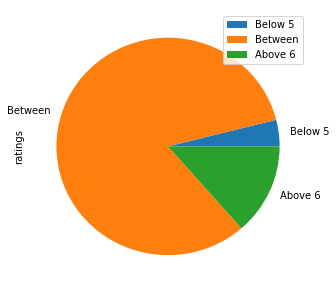

In [10]:
#Let's setup ratings and legends for pie chart
ratings = [rating_below_5, rating_between_5_6, rating_above_6]
legends = ['Below 5', 'Between', 'Above 6']

#Pie chart configuration
df = pd.DataFrame({'ratings': ratings}, index=legends)
plot = df.plot.pie(y='ratings', figsize=(5, 5))

By chart above we see visualization of ratings

## Model preparation step

As a model for wines prediction, I choosed to use <b>linear regression</b> model.

I'll use <b>scikit-learn</b> module to perform linear regression

In [19]:
#Let's remind ourselves how our data set look like ;)
dframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We will use quality column as label (Y) and else columns as a features (X)

In [20]:
#Let's import necessary linear regression from scikit-learn
from sklearn.linear_model import LinearRegression

In [22]:
#Let's remove quality columns as we don't need it, for model fit (training)
X = dframe.drop('quality', axis=1)

In [24]:
#Then we can create LR object
lr = LinearRegression()

In [27]:
#Let's try to fit out linear model, 
#as a first parameter I give whole labels and as a second parameter I give prediction quality
lr.fit(X, dframe['quality'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#Let's see intercept coefficents
lr.intercept_

21.965208449452028

In [33]:
#Let's see number of coefficents
len(lr.coef_)

11

In [35]:
#Now we can see data frame of features and it's coefficents
pd.DataFrame(zip(X.columns, lr.coef_), columns=['features', 'coefficents'])

,features,coefficents
0,fixed acidity,0.024991
1,volatile acidity,-1.083590
2,citric acid,-0.182564
3,residual sugar,0.016331
4,chlorides,-1.874225
5,free sulfur dioxide,0.004361
6,total sulfur dioxide,-0.003265
7,density,-17.881164
8,pH,-0.413653
9,sulphates,0.916334


In [39]:
#As I didn't prepare 20% of data set for testing at the beginning, let's use X for data prediction
lr.predict(X)

array([5.03285045, 5.13787975, 5.20989474, ..., 5.94304255, 5.47075621,
       6.00819633])

Text(0,0.5,'Predicted quality')

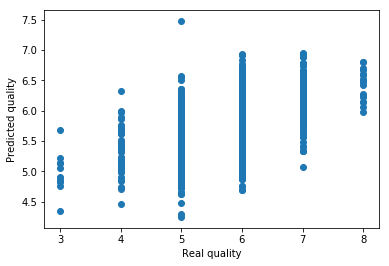

In [41]:
#Let's plot real quality and predicted quality
plt.scatter(dframe['quality'], lr.predict(X))
plt.xlabel('Real quality')
plt.ylabel('Predicted quality')

## Conclusion

- I read data set
- Check and validate data records for right and empty state
- Explore basic chemical terminology
- Visualized data of qualities
- Calculated basic statistical information about data set
- Devided and visualized quality groups as charts
- Perform wine quality prediction by scikit-learn linear regression module